## DataProcessing


In [1]:
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer as label_binarize
from sklearn.datasets import make_blobs

In [2]:
import torch
from torch import nn
from torch.optim import SGD

In [3]:
df = pd.read_csv("/kaggle/input/hae-csv/AM_IM_SS_Multi.csv")
df.head()

,Alloy,No,Component,Fraction,a,delta,Tm,D_Tm,Hmix,?Hmix,Sid,Elec_nega,D_elec_nega,VEC,d_VEC,BulkModulus,D_Bulk,Phase_inshort
0,Zr45.38Ti9.62Cu8.75Ni10Be26.25,5,Zr Ti Cu Ni Be,45.38 9.62 8.75 10 26.25,1.400611,0.146608,1853.515475,283.938040,-37.996770,12.967122,1.378296,1.521077,0.211945,4.687500,2.909440,1.070000e+11,36.898355,AM
1,AlCoCu,3,Al Co Cu,7 1 2,1.383100,0.054241,1101.783000,278.066295,-5.400000,4.272798,0.801819,1.695000,0.129942,5.200000,3.400000,9.920000e+10,36.912870,IM
2,Al20Li20Mg10Sc20Ti30,5,Al Li Mg Sc Ti,20 20 10 20 30,1.517100,0.051625,1314.832000,600.177793,-0.400000,14.116742,1.557113,1.383000,0.225435,2.800000,1.077033,6.630000e+10,35.581034,SS
3,CoCrCuFeZr0.8,5,Co Cr Cu Fe Zr,1 1 1 1 0.8,1.312792,0.099336,1837.327083,295.977082,-9.687500,10.484101,1.605807,1.736250,0.201097,7.750000,2.349645,1.470000e+11,36.733420,AM+IM
4,Al0.5CoCrCuFeNiTi1.4,7,Al Co Cr Cu Fe Ni Ti,0.5 1 1 1 1 1 1.4,1.308377,0.069377,1743.319565,324.684788,-14.022264,9.492334,1.913480,1.759565,0.147643,7.405797,2.704365,1.480000e+11,32.645454,IM+SS


In [4]:
X= df.iloc[:, 5:17].values
y=df.iloc[:,17].values

In [5]:
X

array([[1.46607984e-01, 1.85351547e+03, 2.83938040e+02, ...,
        2.90944045e+00, 1.07000000e+11, 3.68983546e+01],
       [5.42409060e-02, 1.10178300e+03, 2.78066295e+02, ...,
        3.40000000e+00, 9.92000000e+10, 3.69128704e+01],
       [5.16250950e-02, 1.31483200e+03, 6.00177793e+02, ...,
        1.07703296e+00, 6.63000000e+10, 3.55810343e+01],
       ...,
       [1.41207767e-01, 1.15162400e+03, 2.16286440e+02, ...,
        3.00832179e+00, 5.50000000e+10, 5.56003597e+01],
       [1.34029966e-01, 1.78176471e+03, 2.18068669e+02, ...,
        1.90610020e+00, 1.63000000e+11, 5.92373678e+01],
       [6.50244120e-02, 1.82312522e+03, 5.23434026e+02, ...,
        2.43011976e+00, 1.55000000e+11, 3.70871349e+01]])

In [6]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=2024, shuffle=True)
len(X_train), len(X_test), len(y_train), len(y_test)

(480, 121, 480, 121)

In [7]:
scaler=StandardScaler()
X= scaler.fit_transform(X)


In [8]:
X.dtype

dtype('float64')

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
NUM_FEATURES=2
NUM_CLASSES=5

In [148]:
class HAE(nn.Module):
    def __init__(self, in_channels, out_channels, hidden_units=10):
        super(HAE, self).__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=in_channels, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units), 
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=hidden_units), 
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=hidden_units), 
            nn.LeakyReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_channels)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)
model = HAE(NUM_FEATURES, NUM_CLASSES, 10).to(device)
print(model)
total_parameters=sum(p.numel() for p in model.parameters())
print(total_parameters)

HAE(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=10, bias=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): ReLU()
    (14): Linear(in_features=10, out_features=10, bias=True)
    (15): LeakyReLU(negative_slope=0.01)
    (16): Linear(in_features=10, out_features=5, bias=True)
  )
)
855


In [149]:
loss_func= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr=0.1)

In [150]:
X_blob, y_blob = make_blobs(n_samples=2000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=2024)


In [101]:
X_train, X_test, y_train, y_test= train_test_split(X_blob, y_blob, test_size=0.2)
len(X_train), len(y_train), len(X_test), len(y_test)

(1600, 1600, 400, 400)

In [102]:
import matplotlib.pyplot as plt


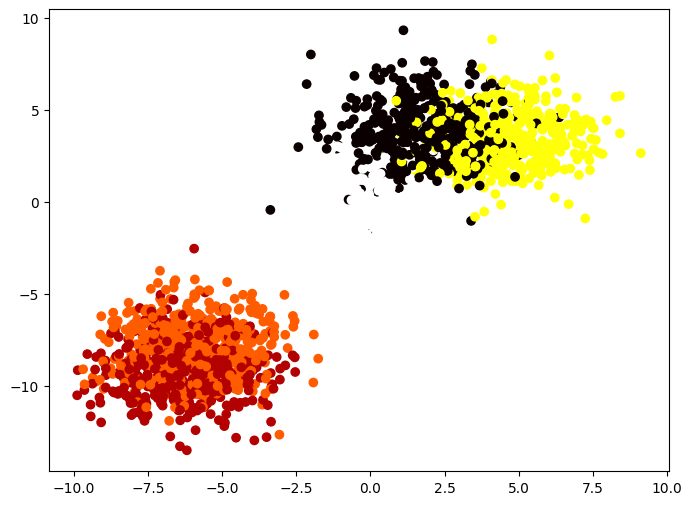

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap="hot")

# Training and Test loops

In [104]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [105]:
X_train.dtype

dtype('float64')

In [106]:
X_train = torch.tensor(X_train).type(torch.float32)
X_test = torch.tensor(X_test).type(torch.float32)
y_train=torch.tensor(y_train).type(torch.float32)
y_test = torch.tensor(y_test).type(torch.float32)
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

torch.float32
torch.float32
torch.float32
torch.float32


In [107]:
print(f"shape is :{X_train.shape}")
print(f"shape is :{X_test.shape} ")
print(f"shape is :{y_train.shape} ")
print(f"shape is :{y_test.shape} ")

shape is :torch.Size([1600, 2])
shape is :torch.Size([400, 2]) 
shape is :torch.Size([1600]) 
shape is :torch.Size([400]) 


In [108]:
device

device(type='cuda')

In [136]:
batch_size=1600
X_test = X_test.repeat(batch_size//X_test.size(0), 1)
X_test.shape


torch.Size([1600, 2])

In [110]:
batch_size=800
y_test =y_test.view(-1)[:len(X_test)]
y_test.shape


torch.Size([400])

In [131]:
y_test = y_test[:1600]
y_test.shape

torch.Size([1600])

In [137]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 2]),
 torch.Size([1600, 2]),
 torch.Size([1600]),
 torch.Size([1600]))

In [146]:
X_test = X_test.to(device)
X_train= X_train.to(device)
y_train= y_train.to(device)
y_test = y_test.to(device)

In [152]:
torch.manual_seed(2024)
epochs = 250
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_logits = model(X_train)
    y_logits = y_logits.to(torch.float32)
    
    
    y_train = y_train.to(torch.float32)
    
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    
    y_train_long = y_train.to(torch.long)
    
    loss = loss_func(y_logits, y_train_long)
    acc = accuracy_fn(y_train_long, y_pred)
    loss.backward()
    optimizer.step()
    
    
    model.eval()
    with torch.no_grad():
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits, dim=1)
        test_loss = loss_func(test_logits, y_test.to(torch.long))  
        _, test_pred_classes = torch.max(test_pred, 1)
        test_acc = accuracy_fn(y_test, test_pred_classes)
        
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss :{loss:.3f} | Test Loss :{test_loss:.3f} | Test Acc :{test_acc:.2f}%")


Epoch:0 | Loss :0.411 | Test Loss :0.538 | Test Acc :75.00%
Epoch:10 | Loss :0.425 | Test Loss :0.516 | Test Acc :75.25%
Epoch:20 | Loss :0.413 | Test Loss :0.535 | Test Acc :75.25%
Epoch:30 | Loss :0.412 | Test Loss :0.509 | Test Acc :75.25%
Epoch:40 | Loss :0.414 | Test Loss :0.510 | Test Acc :75.00%
Epoch:50 | Loss :0.406 | Test Loss :0.550 | Test Acc :75.50%
Epoch:60 | Loss :0.410 | Test Loss :0.509 | Test Acc :75.25%
Epoch:70 | Loss :0.406 | Test Loss :0.518 | Test Acc :75.00%
Epoch:80 | Loss :0.410 | Test Loss :0.506 | Test Acc :74.75%
Epoch:90 | Loss :0.415 | Test Loss :0.524 | Test Acc :73.00%
Epoch:100 | Loss :0.410 | Test Loss :0.547 | Test Acc :75.75%
Epoch:110 | Loss :0.418 | Test Loss :0.522 | Test Acc :75.25%
Epoch:120 | Loss :0.430 | Test Loss :0.528 | Test Acc :75.25%
Epoch:130 | Loss :0.411 | Test Loss :0.536 | Test Acc :75.50%
Epoch:140 | Loss :0.404 | Test Loss :0.517 | Test Acc :75.50%
Epoch:150 | Loss :0.409 | Test Loss :0.518 | Test Acc :74.25%
Epoch:160 | Loss :0